In [1]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from smart_open import smart_open
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from nltk.corpus import stopwords
import os, codecs
%matplotlib inline
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import statsmodels.api as sm

2017-03-04 19:36:05,007 : INFO : 'pattern' package found; tag filters are available for English
/usr/lib64/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in codecs.open(os.path.join(self.dirname, fname)) :
                yield line.split()

In [3]:
sentences = MySentences('/home/bahbbc/Documents/teste-personalidade') # a memory-friendly iterator

In [4]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
num_features = 300
min_word_count = 1   # Minimum word count                        
num_workers = 40       # Number of threads to run in parallel
context = 10          # Context window size             


In [5]:
model = gensim.models.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, window = context)

2017-03-04 19:36:05,655 : INFO : collecting all words and their counts
2017-03-04 19:36:05,658 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-03-04 19:36:05,749 : INFO : PROGRESS: at sentence #10000, processed 98661 words, keeping 27955 word types
2017-03-04 19:36:05,850 : INFO : PROGRESS: at sentence #20000, processed 203143 words, keeping 49341 word types
2017-03-04 19:36:05,915 : INFO : PROGRESS: at sentence #30000, processed 292582 words, keeping 64869 word types
2017-03-04 19:36:05,961 : INFO : PROGRESS: at sentence #40000, processed 396167 words, keeping 81156 word types
2017-03-04 19:36:06,013 : INFO : PROGRESS: at sentence #50000, processed 493400 words, keeping 95005 word types
2017-03-04 19:36:06,056 : INFO : PROGRESS: at sentence #60000, processed 589134 words, keeping 108568 word types
2017-03-04 19:36:06,095 : INFO : PROGRESS: at sentence #70000, processed 676484 words, keeping 119972 word types
2017-03-04 19:36:06,143 : INFO : PROGRESS: at

In [6]:
model.save_word2vec_format('/home/bahbbc/Documents/personality_1')

2017-03-04 19:36:34,178 : INFO : storing 288722x300 projection weights into /home/bahbbc/Documents/personality_1


In [7]:
model = gensim.models.Word2Vec.load_word2vec_format('/home/bahbbc/Documents/personality_1', encoding='utf8', unicode_errors='ignore')
#model = Word2Vec.load_word2vec_format('/home/bahbbc/Documents/teste-personalidade/personality_1',binary=True)
model.init_sims(replace=True)

2017-03-04 19:37:15,652 : INFO : loading projection weights from /home/bahbbc/Documents/personality_1
2017-03-04 19:38:24,870 : INFO : loaded (288722, 300) matrix from /home/bahbbc/Documents/personality_1
2017-03-04 19:38:25,002 : INFO : precomputing L2-norms of word weight vectors


In [8]:
print(model.similarity('hj', 'hoje'))

0.778643689635


In [9]:
print(model.most_similar(positive=['rsrsrs', 'kkk']))

[(u'kkkkkkk', 0.9848357439041138), (u'Kkkk', 0.9830596446990967), (u'Hahahaha', 0.9817096590995789), (u"'-'", 0.9783498048782349), (u'Hahaha', 0.9777824282646179), (u'agora!', 0.9771287441253662), (u'Haha', 0.9767873287200928), (u'hahah', 0.9762501120567322), (u'kkkkkkkkkkk', 0.9759235382080078), (u'kkkkkkkkkkkkkk', 0.9747077822685242)]


In [10]:
print(model.most_similar(positive=['=O', ':D']))

[(u'=D', 0.9709113836288452), (u';D', 0.9704835414886475), (u'hehe', 0.9698134660720825), (u'hoje!!!', 0.9692171812057495), (u':3', 0.9691096544265747), (u'Bonitinho', 0.9669618606567383), (u'Eita', 0.9648981094360352), (u'*o*', 0.96429842710495), (u'Nopants', 0.9637248516082764), (u':-)', 0.9628754258155823)]


In [11]:
print(model.most_similar(positive=['gato', 'cachorro']))

[(u'louco', 0.939111053943634), (u'pequeno,', 0.9384793043136597), (u'neg\xf3cio', 0.937757134437561), (u'velho', 0.9375881552696228), (u'toma', 0.9283500909805298), (u'calor', 0.9224588871002197), (u'her\xf3i', 0.9223655462265015), (u'segredo.', 0.9174177646636963), (u'mano!!', 0.9146966934204102), (u'apelido', 0.913709282875061)]


### Verify model with personality

In [213]:
df = pd.read_csv('~/personality-normalized-word2vec.csv', encoding='utf-8')

In [217]:
df.shape

(1039, 186)

In [49]:
df.extraversion_m.value_counts()

0    529
1    510
Name: extraversion_m, dtype: int64

In [163]:
train_w2v_data, test_w2v_data = train_test_split(df, test_size=0.3, random_state=42)

### Evaluation code

In [157]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    target_names = ['no', 'yes']
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [158]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')

In [159]:
def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data['formatted_text'])
    predictions = classifier.predict(data_features)
    target = data['extraversion_m']
    evaluate_prediction(predictions, target)

### Word2Vec model training

In [160]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.wv.vocab:
            mean.append(wv.wv.syn0norm[wv.wv.vocab[word].index])
            all_words.add(wv.wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(num_features,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, review) for review in text_list ])

In [208]:
def w2v_tokenize_text(text):
    tokens = []
    if text is np.nan:
        return []
    for sent in nltk.sent_tokenize(text, language='portuguese'):
        for word in nltk.word_tokenize(sent, language='portuguese'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [69]:
test_tokenized = test_w2v_data.apply(lambda r: w2v_tokenize_text(r['formatted_text']), axis=1).values
train_tokenized = train_w2v_data.apply(lambda r: w2v_tokenize_text(r['formatted_text']), axis=1).values

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [162]:
%%time
X_train_word_average = word_averaging_list(model,train_tokenized)
X_test_word_average = word_averaging_list(model,test_tokenized)

2017-03-05 09:49:45,448 : WARNING : cannot compute similarity with no input [u'FOREIGN']
2017-03-05 09:49:45,808 : WARNING : cannot compute similarity with no input []
2017-03-05 09:49:46,123 : WARNING : cannot compute similarity with no input []
2017-03-05 09:49:46,129 : WARNING : cannot compute similarity with no input []
2017-03-05 09:49:46,892 : WARNING : cannot compute similarity with no input []
2017-03-05 09:49:47,294 : WARNING : cannot compute similarity with no input []
2017-03-05 09:49:47,711 : WARNING : cannot compute similarity with no input [u'FOREIGN', u'FOREIGN', u'FOREIGN']
2017-03-05 09:49:47,730 : WARNING : cannot compute similarity with no input []
2017-03-05 09:49:48,470 : WARNING : cannot compute similarity with no input []
2017-03-05 09:49:48,563 : WARNING : cannot compute similarity with no input []
2017-03-05 09:49:48,796 : WARNING : cannot compute similarity with no input []
2017-03-05 09:49:48,958 : WARNING : cannot compute similarity with no input []
2017-03-

CPU times: user 4.26 s, sys: 15.2 ms, total: 4.27 s
Wall time: 4.28 s


In [71]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

logreg = logreg.fit(X_train_word_average, train_w2v_data['extraversion_m'])
predicted = logreg.predict(X_test_word_average)

CPU times: user 674 ms, sys: 2.95 ms, total: 677 ms
Wall time: 683 ms


accuracy 0.615384615385
confusion matrix
 [[96 46]
 [74 96]]
(row=expected, col=predicted)


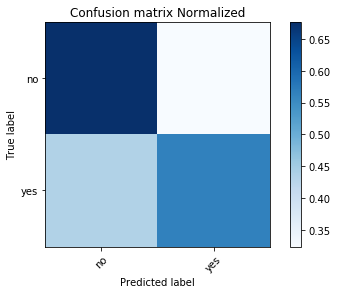

In [72]:
evaluate_prediction(predicted, test_w2v_data.extraversion_m)

## Add dictionary features

In [73]:
personalities = pd.read_csv('personality-normalized.csv')

In [74]:
personalities.shape

(1039, 184)

In [75]:
personalities = personalities.convert_objects(convert_numeric=True)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [76]:
personalities.extraversion_m.value_counts()

0    529
1    510
Name: extraversion_m, dtype: int64

In [164]:
train_data, test_data = train_test_split(personalities, test_size=0.3, random_state=42)

In [78]:
pre_proc_attr = ['skip', 'compound', 'hashtags', 'links', 'punct', 'questions', 'exclam', 'numbers', 'upcase', 'lowcase', 'firstup', 'pt.lexicon', 'added', 'verb.pro', 'names', 'en.lexicon', 'rewrite', 'mispell', 'foreign', 'laugh', 'emph', 'echars', 'unkn']

In [79]:
grammar_attr = ['m', 'f', 's', 'p', 'aument', 'dimin', 'superlat', 'N', 'A', 'PREP', 'CONJ', 'ADV', 'PREFIX', 'SIGLA', 'ABREV', 'INTERJ', 'DET', 'def', 'indef', 'NUM', 'numC', 'numO', 'numM', 'numF', 'PRO', 'proDem', 'proIndef', 'proRel', 'proInterr', 'proTrat', 'proPoss', 'proPess', 'acusativa', 'dativa', 'nominativa', 'obliqua', 'reflexa', 'p1', 'p2', 'p3', 'V', 'VW', 'VG', 'VK', 'VP', 'VI', 'VJ', 'VF', 'VQ', 'VS', 'VT', 'VU', 'VY', 'VC', 'V1s', 'V2s', 'V3s', 'V1p', 'V2p', 'V3p']

In [80]:
liwc_attr = ['X1funct' ,'X2pronoun' ,'X3ppron','X4i','X5we','X6you','X7shehe','X8they','X9ipron','X10article','X11verb','X12auxverb','X13past','X14present','X15future','X16adverb','X17preps','X18conj','X19negate','X20quant','X21number','X22swear','X23social','X24family','X25friend','X26humans','X27affect','X28posemo','X29negemo','X30anx','X31anger','X32sad','X33cogmech','X34insight','X35cause','X36discrep','X37tentat','X38certain','X39inhib','X40incl','X41excl','X42percept','X43see','X44hear','X45feel','X46bio','X47body','X48health','X49sexual','X50ingest','X51relativ','X52motion','X53space','X54time','X55work','X56achieve','X57leisure','X58home','X59money','X60relig','X61death','X62assent','X63nonfl', 'X64filler']

In [81]:
all_attr = train_data.columns[7:157]

In [136]:
def remove_nan(atributes):
    train_attributes = np.array(train_data[atributes])
    test_attributes = np.array(test_data[atributes])
    train_attributes[np.isnan(train_attributes)] = 0
    test_attributes[np.isnan(test_attributes)] = 0
    return (train_attributes, test_attributes)

In [137]:
train, test = remove_nan(liwc_attr)

In [138]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

logreg = logreg.fit(train, train_data['extraversion_m'])
predicted = logreg.predict(test)

CPU times: user 40.8 ms, sys: 985 µs, total: 41.7 ms
Wall time: 42.3 ms


accuracy 0.596153846154
confusion matrix
 [[90 52]
 [74 96]]
(row=expected, col=predicted)


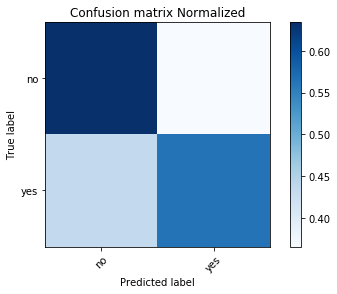

In [139]:
evaluate_prediction(predicted, test_data.extraversion_m)

In [87]:
pd.DataFrame(zip(all_attr, np.transpose(logreg.coef_)))

,0,1
0,skip,[22.1023173653]
1,compound,[2.62026278807]
2,hashtags,[-5.03680049042]
3,links,[-23.1901940465]
4,punct,[-2.70479361288]
5,questions,[0.0210280558811]
6,exclam,[3.07362969057]
7,numbers,[-13.8273735705]
8,upcase,[-29.2593466814]
9,lowcase,[-32.9339765557]


### TODO: Conseguir p-value

## Dictionairies + word embeddings

In [140]:
print train.shape
print X_train_word_average.shape

(727, 64)
(727, 300)


In [145]:
def merge_attributes(conj1, conj2):
    combined_attr = []

    for i in range(0,conj1.shape[0]):
        mixed_attr = np.concatenate((conj1[i], conj2[i]))
        combined_attr.append(mixed_attr)
    return np.vstack(combined_attr)

In [146]:
train_merged = merge_attributes(train, X_train_word_average)
test_merged = merge_attributes(test, X_test_word_average)

In [147]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

logreg = logreg.fit(train_merged, train_data['extraversion_m'])
predicted = logreg.predict(test_merged)

CPU times: user 1.32 s, sys: 5.83 ms, total: 1.33 s
Wall time: 1.34 s


accuracy 0.628205128205
confusion matrix
 [[ 94  48]
 [ 68 102]]
(row=expected, col=predicted)


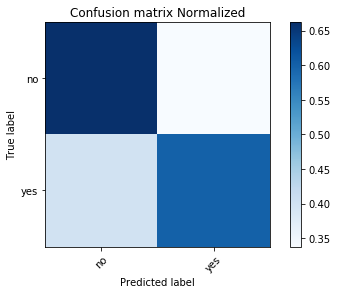

In [148]:
evaluate_prediction(predicted, test_data.extraversion_m)

Fitting a random forest to labeled training data...
accuracy 0.599358974359
confusion matrix
 [[95 47]
 [78 92]]
(row=expected, col=predicted)


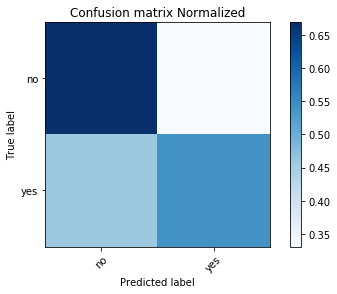

In [318]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 100, random_state = 42 )

print "Fitting a random forest to labeled training data..."
forest = forest.fit( train_merged, train_data["extraversion_m"] )

# Test & extract results 
result = forest.predict( test_merged )

evaluate_prediction(result, test_data.extraversion_m)

## Remove stop words

In [220]:
def w2v_tokenize_text(text):
    tokens = []
    if text is np.nan:
        return []
    for sent in nltk.sent_tokenize(text, language='portuguese'):
        for word in nltk.word_tokenize(sent, language='portuguese'):
            if len(word) < 2:
                continue
            if word in stopwords.words('portuguese'):
                continue
            tokens.append(word)
    return tokens

In [221]:
train_tokenized = train_w2v_data.apply(lambda r: w2v_tokenize_text(r['formatted_text']), axis=1).values
test_tokenized = test_w2v_data.apply(lambda r: w2v_tokenize_text(r['formatted_text']), axis=1).values

In [192]:
%%time
X_train_word_average = word_averaging_list(model,train_tokenized)
X_test_word_average = word_averaging_list(model,test_tokenized)

2017-03-05 10:07:21,411 : WARNING : cannot compute similarity with no input [u'FOREIGN']
2017-03-05 10:07:21,677 : WARNING : cannot compute similarity with no input []
2017-03-05 10:07:21,907 : WARNING : cannot compute similarity with no input []
2017-03-05 10:07:21,912 : WARNING : cannot compute similarity with no input []
2017-03-05 10:07:22,375 : WARNING : cannot compute similarity with no input []
2017-03-05 10:07:22,557 : WARNING : cannot compute similarity with no input []
2017-03-05 10:07:22,822 : WARNING : cannot compute similarity with no input [u'FOREIGN', u'FOREIGN', u'FOREIGN']
2017-03-05 10:07:22,832 : WARNING : cannot compute similarity with no input []
2017-03-05 10:07:23,357 : WARNING : cannot compute similarity with no input []
2017-03-05 10:07:23,425 : WARNING : cannot compute similarity with no input []
2017-03-05 10:07:23,593 : WARNING : cannot compute similarity with no input []
2017-03-05 10:07:23,712 : WARNING : cannot compute similarity with no input []
2017-03-

CPU times: user 2.86 s, sys: 17.2 ms, total: 2.88 s
Wall time: 2.87 s


In [193]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

logreg = logreg.fit(X_train_word_average, train_w2v_data['extraversion_m'])
predicted = logreg.predict(X_test_word_average)?

CPU times: user 718 ms, sys: 1.89 ms, total: 720 ms
Wall time: 724 ms


accuracy 0.608974358974
confusion matrix
 [[91 51]
 [71 99]]
(row=expected, col=predicted)


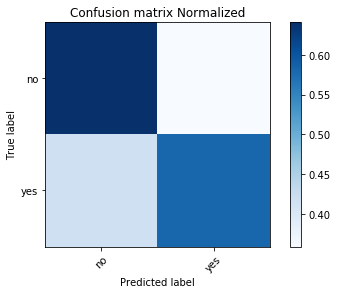

In [194]:
evaluate_prediction(predicted, test_w2v_data.extraversion_m)

## W2V Stop + LIWC

In [195]:
train_merged = merge_attributes(train, X_train_word_average)
test_merged = merge_attributes(test, X_test_word_average)

In [196]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

logreg = logreg.fit(train_merged, train_data['extraversion_m'])
predicted = logreg.predict(test_merged)

CPU times: user 1.28 s, sys: 40.2 ms, total: 1.32 s
Wall time: 1.28 s


accuracy 0.61858974359
confusion matrix
 [[ 84  58]
 [ 61 109]]
(row=expected, col=predicted)


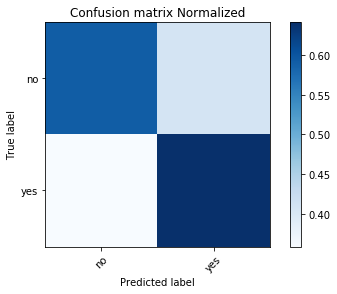

In [197]:
evaluate_prediction(predicted, test_data.extraversion_m)

## Bag of words

In [257]:
index = pd.isnull(train_w2v_data.formatted_text)
train_w2v_data.loc[index, 'formatted_text'] = ''

In [286]:
print "Creating the bag of words...\n"
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = None) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(train_w2v_data.formatted_text)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [287]:
print train_data_features.shape

(727, 41997)


In [288]:
print "Training the random forest..."
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100, random_state = 42) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, train_w2v_data["extraversion_m"] )

Training the random forest...


accuracy 0.605769230769
confusion matrix
 [[92 50]
 [73 97]]
(row=expected, col=predicted)


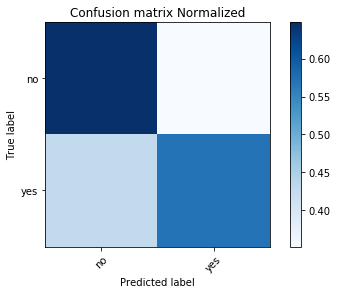

In [289]:
# Get a bag of words for the test set, and convert to a numpy array
index = pd.isnull(test_w2v_data.formatted_text)
test_w2v_data.loc[index, 'formatted_text'] = ''

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(test_w2v_data.formatted_text)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)

evaluate_prediction(result, test_w2v_data.extraversion_m)

In [290]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

logreg = logreg.fit(train_data_features, train_w2v_data['extraversion_m'])
predicted = logreg.predict(test_data_features)

CPU times: user 1.15 s, sys: 224 ms, total: 1.38 s
Wall time: 1.26 s


accuracy 0.583333333333
confusion matrix
 [[83 59]
 [71 99]]
(row=expected, col=predicted)


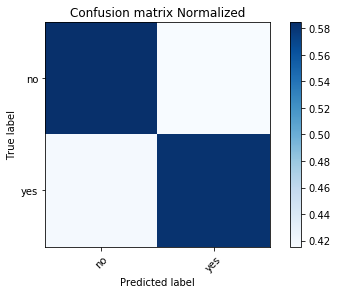

In [291]:
evaluate_prediction(predicted, test_w2v_data.extraversion_m)

## Bag + Embeddings

In [292]:
train_merged = merge_attributes(train_data_features, X_train_word_average)
test_merged = merge_attributes(test_data_features, X_test_word_average)

Training the random forest...
accuracy 0.602564102564
confusion matrix
 [[89 53]
 [71 99]]
(row=expected, col=predicted)


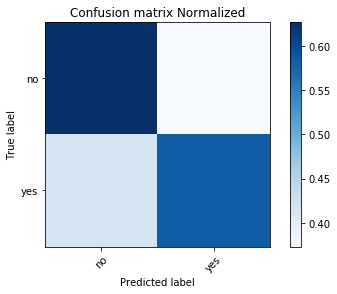

In [302]:
print "Training the random forest..."

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100, random_state = 42) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_merged, train_w2v_data["extraversion_m"] )

result = forest.predict(test_merged)

evaluate_prediction(result, test_w2v_data.extraversion_m)

accuracy 0.599358974359
confusion matrix
 [[88 54]
 [71 99]]
(row=expected, col=predicted)
CPU times: user 2.11 s, sys: 371 ms, total: 2.48 s
Wall time: 2.09 s


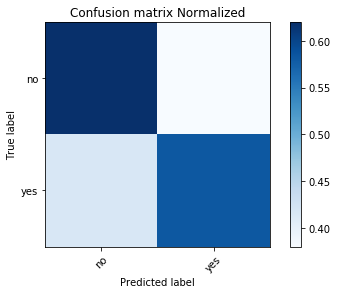

In [294]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

logreg = logreg.fit(train_merged, train_w2v_data['extraversion_m'])
predicted = logreg.predict(test_merged)

evaluate_prediction(predicted, test_w2v_data.extraversion_m)

## Bag + emebeddings + LIWC

In [306]:
train_merged = merge_attributes(train_data_features, X_train_word_average)
test_merged = merge_attributes(test_data_features, X_test_word_average)

In [314]:
train_merged = merge_attributes(train_merged, train)
test_merged = merge_attributes(test_merged, test)

In [315]:
print train_merged.shape
print test_merged.shape

(727, 42361)
(312, 42361)


Training the random forest...
accuracy 0.599358974359
confusion matrix
 [[95 47]
 [78 92]]
(row=expected, col=predicted)


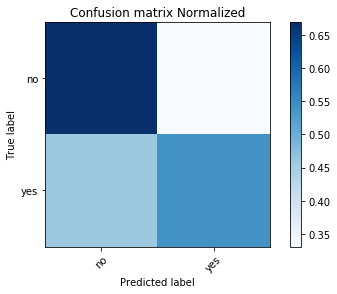

In [316]:
print "Training the random forest..."

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100, random_state = 42) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_merged, train_w2v_data["extraversion_m"] )

result = forest.predict(test_merged)

evaluate_prediction(result, test_w2v_data.extraversion_m)

accuracy 0.589743589744
confusion matrix
 [[91 51]
 [77 93]]
(row=expected, col=predicted)
CPU times: user 1.68 s, sys: 272 ms, total: 1.95 s
Wall time: 1.62 s


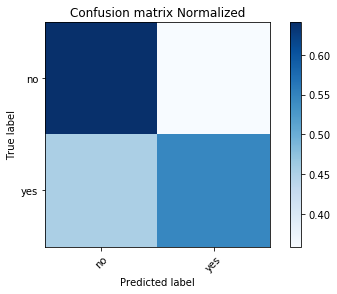

In [317]:
%%time
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

logreg = logreg.fit(train_merged, train_w2v_data['extraversion_m'])
predicted = logreg.predict(test_merged)

evaluate_prediction(predicted, test_w2v_data.extraversion_m)

## Doc2Vec

In [104]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [107]:
def tokenize_text(text):
    tokens = []
    if text is np.nan:
        return []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [179]:
train_tagged = train_w2v_data.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['formatted_text']), tags=[r.extraversion_m]), axis=1)

In [180]:
test_tagged = test_w2v_data.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['formatted_text']), tags=[r.extraversion_m]), axis=1)

In [181]:
%%time
trainsent = train_tagged.values
testsent = test_tagged.values

# simple gensim doc2vec api
doc2vec_model = Doc2Vec(trainsent, workers=1, size=5, iter=20, dm=1)

train_targets, train_regressors = zip(
    *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in trainsent])

2017-03-05 09:55:10,202 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2017-03-05 09:55:10,204 : INFO : collecting all words and their counts
2017-03-05 09:55:10,204 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2017-03-05 09:55:10,688 : INFO : collected 43446 word types and 2 unique tags from a corpus of 727 examples and 1472087 words
2017-03-05 09:55:10,689 : INFO : Loading a fresh vocabulary
2017-03-05 09:55:10,788 : INFO : min_count=5 retains 13634 unique words (31% of original 43446, drops 29812)
2017-03-05 09:55:10,789 : INFO : min_count=5 leaves 1421890 word corpus (96% of original 1472087, drops 50197)
2017-03-05 09:55:10,843 : INFO : deleting the raw counts dictionary of 43446 items
2017-03-05 09:55:10,845 : INFO : sample=0.001 downsamples 46 most-common words
2017-03-05 09:55:10,846 : INFO : downsampling leaves estimated 1039507 word corpus (73.1% of prior 1421890)
2017-03-05 09:55:10,847 : INFO : estimated

CPU times: user 57.4 s, sys: 224 ms, total: 57.7 s
Wall time: 57.7 s


accuracy 0.567307692308
confusion matrix
 [[103  39]
 [ 96  74]]
(row=expected, col=predicted)
1422


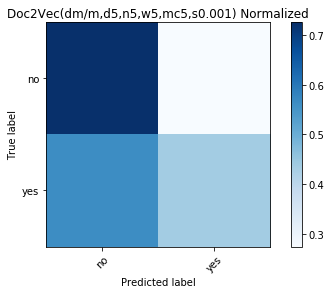

In [203]:
seed = 1422

doc2vec_model.seed = seed
doc2vec_model.random = random.RandomState(seed)


test_targets, test_regressors = zip(
    *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in testsent])


logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5, random_state=42)
logreg = logreg.fit(train_regressors, train_targets)
evaluate_prediction(logreg.predict(test_regressors), test_targets, title=str(doc2vec_model))
print doc2vec_model.seed

In [204]:
train_targets, train_regressors = zip(
    *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in trainsent])

In [205]:
%%time
test_targets, test_regressors = zip(
    *[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in testsent])

CPU times: user 11 s, sys: 0 ns, total: 11 s
Wall time: 11.1 s


accuracy 0.573717948718
confusion matrix
 [[105  37]
 [ 96  74]]
(row=expected, col=predicted)


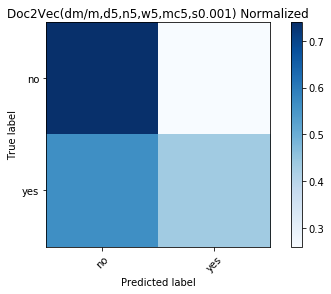

In [206]:
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(train_regressors, train_targets)
evaluate_prediction(logreg.predict(test_regressors), test_targets, title=str(doc2vec_model))

accuracy 0.576923076923
confusion matrix
 [[81 61]
 [71 99]]
(row=expected, col=predicted)
CPU times: user 289 ms, sys: 82.6 ms, total: 371 ms
Wall time: 292 ms


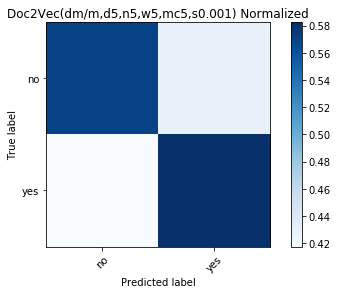

In [207]:
%%time 
knn_test_predictions = [
    doc2vec_model.docvecs.most_similar([pred_vec], topn=1)[0][0]
    for pred_vec in test_regressors
]
evaluate_prediction(knn_test_predictions, test_targets, str(doc2vec_model))